In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
data={
    'Частота_посящений':[25,20,45,60,45,78,18,38,28,52],
    'Средний_чек':[120,5556,345,670,8965,456,8990,2123,43534,5454],
    'Активный_покупатель':[0,1,0,1,0,1,0,0,1,1]
}
df = pd.DataFrame(data)
df

,Частота_посящений,Средний_чек,Активный_покупатель
0,25,120,0
1,20,5556,1
2,45,345,0
3,60,670,1
4,45,8965,0
5,78,456,1
6,18,8990,0
7,38,2123,0
8,28,43534,1
9,52,5454,1


In [26]:
X=df[['Частота_посящений','Средний_чек']]
y=df['Активный_покупатель']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model=SVC(kernel='linear',probability=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f"Точность модели: {acc:2f}")

Точность модели: 0.000000


In [28]:
new_client=pd.DataFrame({
    'Частота_посящений':[20],
    'Средний_чек':[47000]
})
class_pred=model.predict(new_client)[0]
prob=model.predict_proba(new_client)[0][1]
print(f"Клиент классифицирован как:{"Активный покупатель" if class_pred==1 else "Редкий посетитель"}")
print(f'Вероятность быть активным покупателем: {prob:.2f}')
#

Клиент классифицирован как:Редкий посетитель
Вероятность быть активным покупателем: 0.11


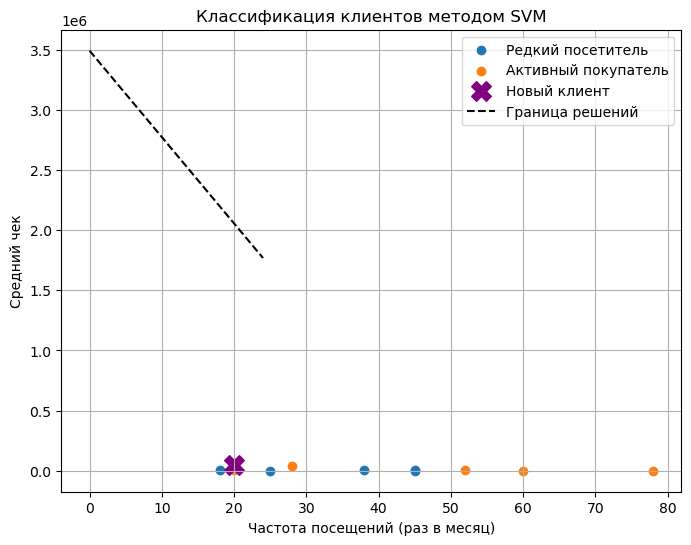

In [29]:
plt.figure(figsize=(8,6))
for i,label in enumerate(['Редкий посетитель','Активный покупатель']):
    plt.scatter(
        df[df['Активный_покупатель']==i]['Частота_посящений'],
        df[df['Активный_покупатель']==i]['Средний_чек'],
        label= label)
plt.scatter(new_client['Частота_посящений'],new_client['Средний_чек'],
            color='purple',marker='X',s=200,
        label= 'Новый клиент')
w = model.coef_[0]
b = model.intercept_[0]
x_points = range(0, 25)
y_points = [-(w[0] * x + b) / w[1] for x in x_points]
plt.plot(x_points, y_points, color='black', linestyle='--', label='Граница решений')
plt.xlabel('Частота посещений (раз в месяц)')
plt.ylabel('Средний чек')
plt.title('Классификация клиентов методом SVM')
plt.legend()
plt.grid(True)
plt.show()
